<a href="https://colab.research.google.com/github/jscienciadados/ciencia-dados/blob/main/Kmeans_Agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = "orange">Estudando técnicas de clusterização com o algoritmo K-Means</fonte>

# <font color = "blue">K-Means</font>

Fonte de Leitura: http://scikit-learning.org/stable/modules/generated/skelarn.cluster.KMeans.html

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_completeness_v_measure
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Sample Generator
from sklearn.datasets.samples_generator import make_blobs


In [3]:
# Definindo manualmente os centros
centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]]

In [4]:
# Gerando os dados
X, y = make_blobs(n_samples = 1000, centers = centers, cluster_std = 0.5, random_state = 101)

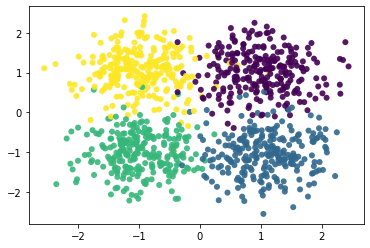

In [5]:
# plot
plt.scatter(X[:,0], X[:,1], c = y, edgecolors= 'none', alpha= 0.9)
plt.show()

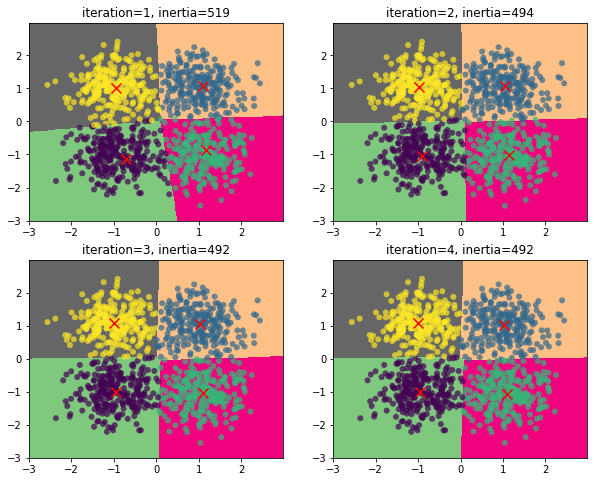

In [6]:
# Gera os clusters e cria o Plot dos Clusters nas Células de Voronoi
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

for n_iter in range(1, 5):

    # Cria o classificador e constrói o modelo com os dados de entrada definidos nas células anteriores
    modelo = KMeans(n_clusters = 4, max_iter = n_iter, n_init = 1, init = 'random', random_state = 101)
    modelo.fit(X)
   
    # Plot
    plt.subplot(2, 2, n_iter)
    h = 0.02
    xx, yy = np.meshgrid(np.arange(-3, 3, h), np.arange(-3, 3, h))
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.imshow(Z,
               interpolation = 'nearest',
               cmap = plt.cm.Accent,
               extent = (xx.min(), xx.max(), yy.min(), yy.max()),
               aspect = 'auto',
               origin = 'lower')

    # Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo.
    # Iteration = Número de iterações definido pelo parâmero n_iter definido acima
    plt.scatter(X[:,0], X[:,1], c = modelo.labels_, edgecolors = 'none', alpha = 0.7)
    plt.scatter(modelo.cluster_centers_[:,0],  modelo.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)
    plt.title("iteration=%s, inertia=%s" %(n_iter, int(modelo.inertia_)))

plt.show()


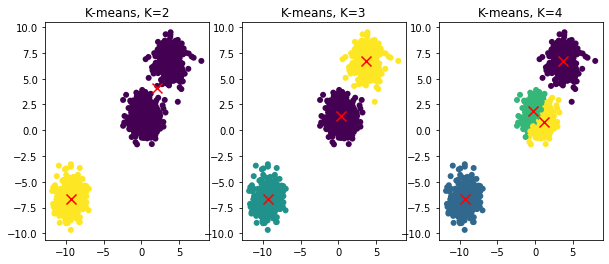

In [7]:
# Diferenças nos clusters de acordo com os valores de K
pylab.rcParams['figure.figsize'] = (10.0, 4.0)

# Gerando nova massa de dados
X, _ = make_blobs(n_samples = 1000, centers = 3, random_state = 101)

for K in [2, 3, 4]:
   
    # Criando o classificador e construindo o modelo
    modelo = KMeans(n_clusters = K, random_state = 101)
    y_pred = modelo.fit_predict(X)
   
    plt.subplot(1, 3, K-1)
    plt.title("K-means, K=%s" % K)
    plt.scatter(X[:, 0], X[:, 1], c = y_pred, edgecolors = 'none')
    plt.scatter(modelo.cluster_centers_[:,0], modelo.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)

plt.show()

# Métricas de Clusterização

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html

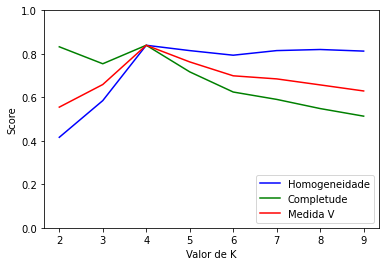

In [8]:
# Checando a homogeneidade dentro do cluster
pylab.rcParams['figure.figsize'] = (6.0, 4.0)

# Definindo a massa de dados
centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]]
X, y = make_blobs(n_samples = 1000, centers = centers, cluster_std = 0.5, random_state = 101)

# Lista com os valores de K
valores_k = range(2, 10)

# Lista para receber as métricas
HCVs = []

# Um resultado de cluster satisfaz a homogeneidade se todos os seus clusters contiverem apenas pontos de
# dados que são membros de uma única classe.

# Um resultado de cluster satisfaz a completude se todos os pontos de dados que são membros
# de uma determinada classe são elementos do mesmo cluster.

# Ambas as pontuações têm valores positivos entre 0,0 e 1,0, sendo desejáveis valores maiores.

# Medida V é a média entre homogeneidade e completude.

for K in valores_k:
   
    # Criando o classificador e fazendo previsões sobre o cluster para cada ponto de dados
    y_pred = KMeans(n_clusters = K, random_state = 101).fit_predict(X)
   
    # Calculando as métricas
    HCVs.append(homogeneity_completeness_v_measure(y, y_pred))

plt.plot(valores_k, [el[0] for el in HCVs], 'b', label = 'Homogeneidade')
plt.plot(valores_k, [el[1] for el in HCVs], 'g', label = 'Completude')
plt.plot(valores_k, [el[2] for el in HCVs], 'r', label = 'Medida V')
plt.ylim([0, 1])
plt.xlabel("Valor de K")
plt.ylabel("Score")
plt.legend(loc = 4)
plt.show()

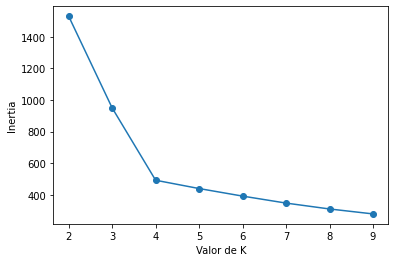

In [9]:
# Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo.

# Lista de valores de K
Ks = range(2, 10)

# Lista para as métricas
valores_metrica = []

# Loop por diferentes modelos com diferentes valores de K
for K in Ks:
    modelo = KMeans(n_clusters = K, random_state = 101)
    modelo.fit(X)
    valores_metrica.append(modelo.inertia_)

plt.plot(Ks, valores_metrica, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()
